In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Open data
raw_data = pd.read_csv('vehicles.csv')

raw_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [152]:
# Get Pickups & Trucks

trucks = raw_data[(raw_data['type'] == 'pickup') | (raw_data['type'] == 'truck')]

trucks.type.value_counts()

pickup    49547
truck     49510
Name: type, dtype: int64

In [170]:
trucks.cylinders.value_counts()

8 cylinders     48114
6 cylinders     18975
4 cylinders      2588
10 cylinders      993
5 cylinders       359
other             151
12 cylinders       19
3 cylinders        17
Name: cylinders, dtype: int64

In [153]:
# Top 20 Manufacturers

manu = trucks['manufacturer'].value_counts()

top_manu = manu[0:20]

top_manu.index

Index(['ford', 'chevrolet', 'ram', 'gmc', 'toyota', 'nissan', 'dodge', 'honda',
       'jeep', 'mitsubishi', 'cadillac', 'mazda', 'volvo', 'lincoln',
       'harley-davidson', 'mercedes-benz', 'subaru', 'volkswagen', 'bmw',
       'datsun'],
      dtype='object')

In [154]:
# Restrict data to top 20 manufacturers

top_trucks = trucks[trucks['manufacturer'].isin(top_manu.index)]

top_trucks.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,NaN,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",NaN,ut,40.3744,-104.694
6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,NaN,ut,40.3744,-104.694
7,7034405349,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,14500,2007.0,gmc,sierra,NaN,NaN,...,4wd,NaN,pickup,NaN,https://images.craigslist.org/00202_jTNQzQVWZs...,2007 GMC Sierra 1500 SLE Crew Cab 4WD Offe...,NaN,ut,40.3744,-104.694
8,7034404595,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12500,2013.0,ford,f-250,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00F0F_99lwfqrZWc...,2013 Ford F-250 F250 F 250 SD XLT 4WD Offe...,NaN,ut,40.3744,-104.694


In [25]:
top_trucks.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [155]:
# Get relevant columns
data = top_trucks[['price', 'year', 'condition', 'odometer', 'manufacturer', 'model']].dropna()

data.head()

,price,year,condition,odometer,manufacturer,model
48,28000,2004.0,good,67348.0,ford,f550 mechanics service
69,24700,2010.0,excellent,262000.0,ram,diesel cummins 3500
135,38995,2016.0,good,38086.0,ford,f-150
155,7435,2004.0,excellent,201312.0,ram,1500
157,5000,2003.0,good,209000.0,toyota,tundra


In [27]:
len(data)

48854

In [28]:
# Condition function

def conv_cond(val):
    if val == 'new':
        return 5
    elif val == 'like new':
        return 4
    elif val == 'excellent':
        return 3
    elif val == 'good':
        return 2
    elif val == 'fair':
        return 1
    else:
        return 0

In [156]:
# Condition

data['condition'] = data['condition'].apply(conv_cond)

print(data.condition.value_counts().sort_index())

data.head()

0       89
1     1716
2    18979
3    23952
4     3930
5      188
Name: condition, dtype: int64


,price,year,condition,odometer,manufacturer,model
48,28000,2004.0,2,67348.0,ford,f550 mechanics service
69,24700,2010.0,3,262000.0,ram,diesel cummins 3500
135,38995,2016.0,2,38086.0,ford,f-150
155,7435,2004.0,3,201312.0,ram,1500
157,5000,2003.0,2,209000.0,toyota,tundra


In [157]:
# Price

data = data[(data['price'] > 100) & (data['price'] <= 80000)]

print(len(data))

data['price'].describe()

45907


count    45907.000000
mean     17855.254515
std      11505.714720
min        130.000000
25%       8500.000000
50%      15999.000000
75%      25000.000000
max      78800.000000
Name: price, dtype: float64

In [158]:
# Odometer

data = data[data['odometer'] < 900000]

data['odometer'].describe()

count     45831.000000
mean     118841.685104
std       70733.852819
min           0.000000
25%       66812.500000
50%      114667.000000
75%      163237.500000
max      885148.000000
Name: odometer, dtype: float64

In [32]:
len(data)

45831

In [33]:
# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Model 1

In [34]:
# Get dummies (removed veh model)

data_ml = pd.get_dummies(data.iloc[:, 0:5])

data_ml.head()

,price,year,condition,odometer,manufacturer_bmw,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_datsun,manufacturer_dodge,manufacturer_ford,...,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
48,28000,2004.0,2,67348.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69,24700,2010.0,3,262000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
135,38995,2016.0,2,38086.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
155,7435,2004.0,3,201312.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
157,5000,2003.0,2,209000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
data_ml.columns


Index(['price', 'year', 'condition', 'odometer', 'manufacturer_bmw',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_jeep', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_ram',
       'manufacturer_subaru', 'manufacturer_toyota', 'manufacturer_volkswagen',
       'manufacturer_volvo'],
      dtype='object')

In [36]:
# Split data

X = data_ml.iloc[:, 1:]
y = data_ml.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [37]:
# Fit Model

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Eval

print(f'''
Train: {model1.score(X_train, y_train)}
Test: {model1.score(X_test, y_test)}''')


Train: 0.5142882689933267
Test: 0.5209336964714706


# Model 2 - Normalized

In [116]:
datan = data.copy()

datan.head()

,price,year,condition,odometer,manufacturer,model
48,28000,2004.0,2,67348.0,ford,f550 mechanics service
69,24700,2010.0,3,262000.0,ram,diesel cummins 3500
135,38995,2016.0,2,38086.0,ford,f-150
155,7435,2004.0,3,201312.0,ram,1500
157,5000,2003.0,2,209000.0,toyota,tundra


In [108]:
def norm(val, col):
    out = (val - data[col].min()) / (data[col].max() - data[col].min())
    return out

In [117]:
# Normalize Price
datan['price'] = datan['price'].apply(norm, args=('price',))

In [118]:
# Normalize Odometer
datan['odometer'] = datan['odometer'].apply(norm, args=('odometer',))

In [111]:
# Normalize year and condition...
#datan['year'] = datan['year'].apply(norm, args=('year',))
#datan['condition'] = datan['condition'].apply(norm, args=('condition',))

In [119]:
# Get dummies (removed veh model)

datan_ml = pd.get_dummies(datan.iloc[:, 0:5])

datan_ml.head()

,price,year,condition,odometer,manufacturer_bmw,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
48,0.279063,2004.0,2,0.067348,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
69,0.246020,2010.0,3,0.262000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
135,0.389156,2016.0,2,0.038086,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
155,0.073145,2004.0,3,0.201312,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
157,0.048763,2003.0,2,0.209000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [120]:
# Split data


X = datan_ml.iloc[:, 1:]
y = datan_ml.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [121]:
# Fit Model

model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
# Eval

print(f'''
Train: {model2.score(X_train, y_train)}
Test: {model2.score(X_test, y_test)}''')


Train: 0.5048936407826583
Test: 0.5244676079685995


# Model 3 - Standardized

In [166]:
datas = data.copy()

datas.head()

,price,year,condition,odometer,manufacturer,model
48,28000,2004.0,2,67348.0,ford,f550 mechanics service
69,24700,2010.0,3,262000.0,ram,diesel cummins 3500
135,38995,2016.0,2,38086.0,ford,f-150
155,7435,2004.0,3,201312.0,ram,1500
157,5000,2003.0,2,209000.0,toyota,tundra


In [167]:
# Get dummies (removed veh model)

datas_ml = pd.get_dummies(datas.iloc[:, 0:5])

datas_ml.head()

,price,year,condition,odometer,manufacturer_bmw,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
48,28000,2004.0,2,67348.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
69,24700,2010.0,3,262000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
135,38995,2016.0,2,38086.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
155,7435,2004.0,3,201312.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
157,5000,2003.0,2,209000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
# Standardizing Data

scaler = preprocessing.StandardScaler()
names = datas_ml.columns

# Fit your data on the scaler object

scaled_df = scaler.fit_transform(datas_ml[['price', 'odometer']])
scaled_df = pd.DataFrame(scaled_df, columns=['price', 'odometer'])
datas_ml_temp = scaled_df.merge(datas_ml.iloc[:, 4:], left_index=True, right_index=True)
datas_ml_temp['year'] = datas_ml['year']
datas_ml_temp['condition'] = datas_ml['condition']
datas_ml = datas_ml_temp


datas_ml.head()

,price,odometer,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_jeep,manufacturer_lincoln,...,manufacturer_mercedes-benz,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,year,condition
48,-0.015338,-0.855692,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2004.0,2
69,-0.526756,0.322857,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2010.0,3
135,0.453284,-0.157018,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016.0,2
155,1.306215,-1.637257,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2004.0,3
157,0.521911,-0.995955,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2003.0,2


In [173]:
# Split data

X = datas_ml.iloc[:, 1:]
y = datas_ml.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [174]:
# Fit Model

model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
# Eval

print(f'''
Train: {model3.score(X_train, y_train)}
Test: {model3.score(X_test, y_test)}''')


Train: 0.2675916626593182
Test: 0.24139057021204302


# Save Model 1 to Joblib

In [33]:
from joblib import dump, load
dump(model1, 'model.joblib')

['model.joblib']

# Building JSON's

In [180]:
# Create JSON for app
data_json = top_trucks[['year', 'manufacturer', 'model','url', 'price',  'condition','odometer', 
                       'state', 'lat', 'long']].dropna()
data_json = data_json[(data_json['price'] > 100) & (data_json['price'] <= 100000)]
data_json = data_json[data_json['odometer'] < 1000000]

In [179]:
top_manu.index

Index(['ford', 'chevrolet', 'ram', 'gmc', 'toyota', 'nissan', 'dodge', 'honda',
       'jeep', 'mitsubishi', 'cadillac', 'mazda', 'lincoln', 'volvo',
       'harley-davidson', 'mercedes-benz', 'subaru', 'volkswagen', 'bmw'],
      dtype='object')

In [181]:
for item in top_manu.index:
    df = data_json[data_json['manufacturer'] == item]
    df.to_json(f'data2/{item}.json', orient='records')

# KNN

In [144]:
# Imports

from sklearn.neighbors import KNeighborsClassifier

In [159]:
data1 = data.copy()
data1.head()

,price,year,condition,odometer,manufacturer,model
48,28000,2004.0,2,67348.0,ford,f550 mechanics service
69,24700,2010.0,3,262000.0,ram,diesel cummins 3500
135,38995,2016.0,2,38086.0,ford,f-150
155,7435,2004.0,3,201312.0,ram,1500
157,5000,2003.0,2,209000.0,toyota,tundra


In [161]:
# Price bins

bin1 = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000]

len(bin1)

25

In [162]:
# Price Converter

def price_conv(val, binner):
    for i in range(len(binner)):
        if val <= binner[i]:
            return i
            

In [163]:
data1['price_range'] = data1['price'].apply(price_conv, args=(bin1,))

data1.head()

,price,year,condition,odometer,manufacturer,model,price_range
48,28000,2004.0,2,67348.0,ford,f550 mechanics service,14
69,24700,2010.0,3,262000.0,ram,diesel cummins 3500,13
135,38995,2016.0,2,38086.0,ford,f-150,16
155,7435,2004.0,3,201312.0,ram,1500,8
157,5000,2003.0,2,209000.0,toyota,tundra,5


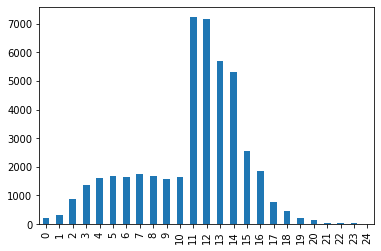

In [164]:
bin_counts = data1['price_range'].value_counts().sort_index()

bin_counts.plot(kind='bar', tick_label=bin1)

In [165]:
# Get dummies
data1_ml = pd.get_dummies(data1.drop(columns=['model', 'price']))

data1_ml.head()

,year,condition,odometer,price_range,manufacturer_bmw,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_datsun,manufacturer_dodge,manufacturer_ford,...,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
48,2004.0,2,67348.0,14,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
69,2010.0,3,262000.0,13,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
135,2016.0,2,38086.0,16,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
155,2004.0,3,201312.0,8,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
157,2003.0,2,209000.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [166]:
# Split data

X = data1_ml.drop(columns=['price_range'])
y = data1_ml['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [167]:
# Fit model
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [168]:
# Evaluation

print(f'''
Train: {neigh.score(X_train, y_train)}
Test: {neigh.score(X_test, y_test)}''')


Train: 0.9666157538730089
Test: 0.9637831351587215


# Save KNN Model to Joblib

In [169]:
from joblib import dump, load
dump(neigh, 'neigh.joblib')

['neigh.joblib']

In [123]:
# Sample input

sample = [0]*23

sample[0] = 2005
sample[1] = 2
sample[2] = 100000
sample[5] = 1

sample

[2005, 2, 100000, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [128]:
# Predict

print(neigh.predict([sample])[0])
bin1[neigh.predict([sample])[0]]

5


5000

In [112]:
data[(data.manufacturer == 'chevrolet') & (data.condition == 2) & (data.odometer > 90000) & (data.odometer > 120000)]['price'].describe()

count     2158.000000
mean      9749.491659
std       6838.623319
min        150.000000
25%       4500.000000
50%       7995.000000
75%      13500.000000
max      70000.000000
Name: price, dtype: float64

REGRESSION RESULTS:

Model 1:
Train: 0.5046616427077997
Test: 0.5247554672263748

Model 2: (full norm)
Train: 0.5060033001659626
Test: 0.5199559236578664

Model 2: (price & odo norm)
Train: 0.5048936407826583
Test: 0.5244676079685995

Model 3: (standard)
Train: 0.497309249715279
Test: 0.5256908108253608

Model 3: (price & odo standard)
Train: 0.2675916626593182
Test: 0.24139057021204302

KNN RESULTS:

n=1:
Train: 0.9650883700632773
Test: 0.9698920039271299

n=2:
Train: 0.7807113244599607
Test: 0.7809534198756409

n=3:
Train: 0.6947414357407812
Test: 0.6976109959637832

n=4:
Train: 0.6425649138119136
Test: 0.6463401330860696